# AESB3343 - Mineral Resource Geology and Modelling
## Exploratory Geological Data Analysis


Welcome to the second assignment of your course, the jupyter notebooks of Exploratory Geological Data Analysis. By working through the following questions, you will exercise yourself in how to interpret data, how to manipulate them with different perspectives, and how to visualize them.

As you might remember, the Learning Objectives we covered together were:

- Identify suitable methods for spatial modelling of ore body attributes related to the problem on hand by applying methods of explorative data analysis and variography;
- Judge assumptions in resource modelling, confidence in resultant models and their inherent uncertainty;
- Perform a computer-aided resource estimation exercise for a geologically continuous orebody from drill hole data to reporting on resources using commercially available software.

and Sub-Learning Objectives were also:
- Provide a comprehensive knowledge of the statistical and spatial characteristics of all variables of interest for resource/reserve estimation
- Document and understand the interrelations among the variables of interest
- Recognize and define distinctive geologic domains that must be evaluated independently for mineral inventory estimation
- Identify and understand outliers and errors
- Evaluate similarity/dissimilarity of various types of raw data, especially samples of different supports

However not all LOs can be covered in an assignment, the experience and skills you are going to gain here will be the foundation of solving bigger more complex problems. This assignment will test your systematic thinking skills and require you to fully understand the type of data you work with. Good luck!

To gain a sense about the difficulty of questions, see the table below:

<div align='center'>

| **Question#** | **Score** | **Difficulty** |
|:----:|:-------:|:------:|
| 1 | 1 | * |
| 2 | 2 | ** |
| 3 | 2 | *** |
| 4 | 2 | ** |
| 5 | 3 | *** |
| 6 | 8 | ***** |
| 7 | 2 | ** |
| 8 | 2 | * |
| 9 | 4 | *** |
| 10 | 2 | ** |
| 11 | 3 | **** |
| 12 | 5 | **** |
| 13 | 2 | ** |
| 14 | 2 | * |
| Total | 40 | Average: *** |

</div>

The grade scheme for this assignment is as follows:

<div align='center'>

| **Assignment grade scheme** | **Final Grade** |
|:----:|:-------:|
| 0-17 | Fail |
| 18-21 | 5.0 |
| 22-25 | 6.0 |
| 26-30 | 7.0 |
| 31-35 | 8.0 |
| 36-38 | 9.0 |
| 39-40  | 10.0  |
</div>

# Hand in:


Upload your submission into Brightspace: before __21/03/2025__

We recommend you to post your questions on the [__*Python Practical Forum*__](https://brightspace.tudelft.nl/d2l/le/679457/discussions/topics/94060/View), as your friends might have the same question like you, or you might find your answer on Brightspace before asking us. 

In the following cell, some packages have been imported by default. Feel free to change if you want to add more or remove them.

<div align=center>

| # | **Tips and Rules** |
|:-:|:-:|
|   1  |   __Rename this file to `Assignment II - <FIRST_LASTNAME> <STUDENTNR>.ipynb`.__   |
|   2  |   __Only submit `ipynb` file on Brightspace. PDF,HTML, or other formats will not be assessed.__   |
|   3  |   __In all questions, print the results, numbers, or your thoughts, with `print` function__   |
|   4  |   __Round up all numeric geochemical values to 3 decimal places__   |
|   5  |   __You can ignore `DENSITY` and `NLITH` columns for now__   |

</div>


In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from matplotlib import mlab
import itertools
from scipy.stats import skew

We shared different tables with you on Brightspace, `assays.txt`, `lithology.txt`, `collar.txt`, and `survey.txt`. Several python libraries can be used, however, we recommend you `pandas` and `numpy` here. Notice that these packages are not mandatory to attain scores, and all other approaches and libraries are welcome to be used.

<div align=center>

| # | **Question** | Score |
|:-:|:-:|:-:|
|   1  |   read each of `txt` files separately, and store them with a prefix of `df_` each.   |  1  |

</div>

In [2]:
df_lithology = pd.read_csv("lithology.txt")
df_assays = pd.read_csv("assays.txt")
df_survey = pd.read_csv("survey.txt")
df_collar = pd.read_csv("collar.txt")

<div align=center>

| # | **Question** | Score |
|:-:|:-:|:-:|
|  2  | Merge `df_survey` and `df_collar`. how many boreholes have `Depth` greater than 400 meters? |  2  |

</div>

In [3]:
merged_df_survey_collar = pd.merge(df_survey, df_collar)
depth_count = merged_df_survey_collar[merged_df_survey_collar["Depth"] > 400].shape[0]
print(depth_count)

72


<div align=center>

| # | **Question** | Score |
|:-:|:-:|:-:|
|  3  | Merge `df_collar` and `df_assay` together, then provide statistical indicators ( minimum of mean, variance, and skewness ) of `CU` values at which their borehole `X` lies between 8300 and 8350, including both. |  2  |

</div>

In [4]:
merged_df_collar_assay = pd.merge(df_collar, df_assays)
x_between = merged_df_collar_assay[(merged_df_collar_assay["X"] >= 8300) & (merged_df_collar_assay["X"] <= 8350)]
min_CU = x_between["CU"].min()
mean_CU = x_between["CU"].mean()
median_CU = x_between["CU"].median()
skewness_CU = skew(x_between["CU"], bias=False)

print(min_CU, mean_CU, median_CU, skewness_CU)

0.0 0.42580325890162946 0.326 1.2940698693129518


<div align=center>

| # | **Question** | Score |
|:-:|:-:|:-:|
|  4  | Merge `df_assay` and `df_lithology` dataframes, and provide your thought about the shape and structure of the merged file. |  2  |

</div>

In [7]:
merged_df_assays_lithology = pd.merge(df_assays, df_lithology, on="BHID")
merged_df_assays_lithology

,BHID,FROM_x,TO_x,CU,FROM_y,TO_y,LITH,NLITH,DENSITY
0,BH1,4.0,6.0,0.010,0.0,58.0,L,0,2.55
1,BH1,4.0,6.0,0.010,58.0,170.0,S,1,2.75
2,BH1,4.0,6.0,0.010,170.0,328.0,H,2,2.65
3,BH1,6.0,8.0,0.010,0.0,58.0,L,0,2.55
4,BH1,6.0,8.0,0.010,58.0,170.0,S,1,2.75
...,...,...,...,...,...,...,...,...,...
58551,BH99,548.0,550.0,0.164,98.0,192.0,S,1,2.75
58552,BH99,548.0,550.0,0.164,192.0,552.0,H,2,2.65
58553,BH99,550.0,552.0,0.236,0.0,98.0,L,0,2.55
58554,BH99,550.0,552.0,0.236,98.0,192.0,S,1,2.75


<div align=center>

| # | **Question** | Score |
|:-:|:-:|:-:|
|  5  | Merge collar, survey, and assay dataframe together to shape a new drillholes dataframe. Name it `df_holes`. Find the length of samples and plot a histogram of it. What length is the most occurenct one across boreholes? |  3  |

</div>

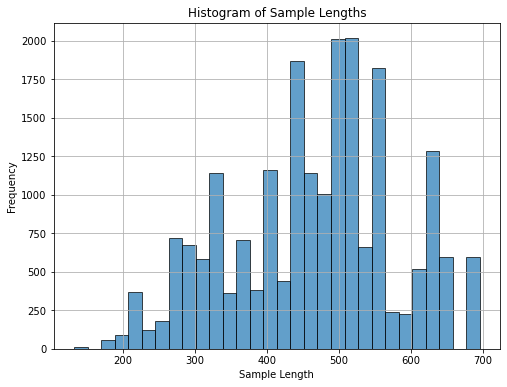

In [12]:
df_holes = pd.merge(df_collar, df_survey)
df_holes = pd.merge(df_holes, df_assays, on="BHID")


plt.figure(figsize=(8,6))
plt.hist(df_holes["Depth"], bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Sample Lengths")
plt.xlabel("Sample Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

<div align=center>

| # | **Very Tough Question** | Score |
|:-:|:-:|:-:|
|  6  | Composite samples of this dataset (`df_holes`) with the approperiate interval with considering lithology as well. Name the output `df_composite` as we are going to use this variable a lot in the following questions. |  8  |

__The result should be a dataframe where you indicated for each `BHID` the interval `FROM` - `TO` with associated `CU` grade and `LITH` indicator.__

</div>

Hint: for creating drillholes with considering lithology `LITH`, follow the steps below for better understanding as recommendation:
1. Start by drawing the starting DataFrames on a paper with the columns and headers
2. Following, draw the final `DataFrame` you would like to get that contains all data necessary for plotting.
3. You could start with your `assay` dataframe. You can fill a new `LITH` column by finding from your interval the corresponding lithology from the lithology dataframe.
4. If you have difficulties finding the lithology in an interval (some lithos present), perhaps make a new lithology called `CONTACT`...

This is similar to the in-class activity we did together. like always, do let us know if any queries.

In [ ]:
def assign_lithology(row, lith_df):
    match = lith_df[(lith_df["BHID"] == row["BHID"]) & 
                    (lith_df["FROM"] <= row["FROM"]) & 
                    (lith_df["TO"] >= row["TO"])]
    return match["LITH"].values[0] if not match.empty else None

df_composite["LITH"] = df_holes.apply(lambda row: assign_lithology(row, df_lithology), axis=1)
   

In [ ]:
df_composite = df_composite[["BHID", "FROM", "TO", "CU", "LITH"]]
df_composite

,BHID,FROM,TO,CU,LITH
0,BH1,4.0,6.0,0.010,L
1,BH1,6.0,8.0,0.010,L
2,BH1,8.0,10.0,0.010,L
3,BH1,10.0,12.0,0.010,L
4,BH1,12.0,14.0,0.010,L
...,...,...,...,...,...
20978,BH156,490.0,492.0,1.370,H
20979,BH156,492.0,494.0,0.972,H
20980,BH156,494.0,496.0,1.413,H
20981,BH156,496.0,498.0,0.751,H


<div align=center>

| # | **Question** | Score |
|:-:|:-:|:-:|
|  7  | Compare your results ( `df_composite` ) with other dataframes such as `df_holes` and `df_lith` to see whether the compositing has been executed properly. Provide your thoughts and reasons about null values, your approach in dealing with them, and lithological intersections |  2  |

</div>

<div align=center>

__Pay attention that from this question onwards, we are using `df_composite` for further analysis, since the data support is now well-respected__

</div>

In [ ]:
print(df_composite)
print(df_holes)

<div align=center>

| # | **Question** | Score |
|:-:|:-:|:-:|
|  8  | Could you explain how the lithology was assigned for borehole BH124? |  2  |

</div>

Since BH124 is missing from the lithology.txt file, the above code assigned the value  'none' to it. since we dont have lithological data on this bh we can choose to remove it from the dataset

<div align=center>

| # | **Question** | Score |
|:-:|:-:|:-:|
|  9  | Make a scatter plot of depth versus copper grade of samples, color the points with their associated `LITH`. Describe the depth distribution of each lithology, and support your claims with plots and codes if necessary. ( hint: you can use `violinplot` and `describe` for better understanding about depth beside the scatter plot and other techniques ) |  4  |

</div>

<div align=center>

| # | **Question** | Score |
|:-:|:-:|:-:|
|  10  | At which borehole, the maximum value of copper can be seen? At which depth/interval is this value observed?( lets  call this borehole hereinafter as `BH_MAX` ). |  2  |

</div>

<div align=center>

| # | **Tough Question** | Score |
|:-:|:-:|:-:|
|  11  | For `BH_MAX` borehole, make two plots of `CU` against `FROM`, one of which should contain cumulative values. How many sudden changes ( or peaks ) of copper can you see along `FROM` interval for this borehole roughly? ( hint: check out `cumsum` function ) |  3  |

</div>

From the outcome of two previous questions, you have found at which borehole ( `BHID` ) and at which depth( from which `FROM` to which `TO` ), maximum copper value is detected. Assuming this value as outlier, in the following questions we are going to extend our investigation interval by 8 meters, looking more about data in the surrounding of outlier across all boreholes. 

<div align=center>

| # | **Tough Question** | Score |
|:-:|:-:|:-:|
|  12  | Create a new variable `df_interval` in which all boreholes included at the interval detected as copper high-value, extending ± 8 meters. this variable will contain all copper values from all boreholes, but filtered out samples that are not fit in the new intervals margin. What is the average of copper per interval in `df_interval`? create a separte bar plot of average values against `FROM` and provide your thoughts about average variation inside the plot.  |  5  |

</div>

<div align=center>

| # | **Question** | Score |
|:-:|:-:|:-:|
|  13  | Investiage which borehole(s) do not have any valid values of `CU` at all in `df_interval`. Support your reasons and findings with appropriate graphs/analysis (hint: you can use `numpy.setdiff1d`, `set`, or `numpy.all`) |  2  |

</div>

<div align=center>

| # | **Question** | Score |
|:-:|:-:|:-:|
|  14  | If you are supposed to use this dataset ( `df_composite` )for kriging estimation methods ( Ordinary or Simple ), what would be your strategy in dealing with this outlier and missing values? provide your reasons with the adequate support. ( codes and plots if needed ) |  2  |

</div>